# Vehicle Dataset 2024

In [ ]:
'''Price Prediction: Build models to predict vehicle prices based on features such as make, model, year, and mileage.
    
Market Analysis: Perform market segmentation and identify trends in vehicle types, brands, and pricing.
    
Descriptive Statistics: Conduct comprehensive descriptive statistical analyses to summarize and describe the main features of the dataset.
    
Visualization: Create visualizations to illustrate the distribution of prices, mileage, and other features across different vehicle types.
    
Data Cleaning: Practice data cleaning techniques, handling missing values, and transforming data for further analysis.
    
Feature Engineering: Develop new features to improve model performance, such as price per year or mileage per year.'''

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vehicles_dataset.csv')
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

In [4]:
df.shape

(1002, 18)

In [5]:
df.drop(columns = ['name', 'description', 'transmission', 'trim', 'exterior_color', 'interior_color', 'drivetrain', 'type', 'doors'], inplace = True)
df.head()

,make,model,year,price,engine,cylinders,fuel,mileage,body
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,SUV
1,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,SUV
2,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,SUV
3,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,SUV
4,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Pickup Truck


In [6]:
df.rename(columns={'make': 'brand'}, inplace=True)
df.head()

,brand,model,year,price,engine,cylinders,fuel,mileage,body
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,SUV
1,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,SUV
2,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,SUV
3,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,SUV
4,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Pickup Truck


In [7]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode().iloc[0]

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price:.2f}")

Mean Price: 50202.99
Median Price: 47165.00
Mode Price: 46835.00


In [8]:
price_range = df['price'].max() - df['price'].min()
price_variance = df['price'].var()
price_std_dev = df['price'].std()

print(f"Price Range: {price_range:.2f}")
print(f"Price Variance: {price_variance:.2f}")
print(f"Price Standard Deviation: {price_std_dev:.2f}")

Price Range: 195895.00
Price Variance: 349704663.27
Price Standard Deviation: 18700.39


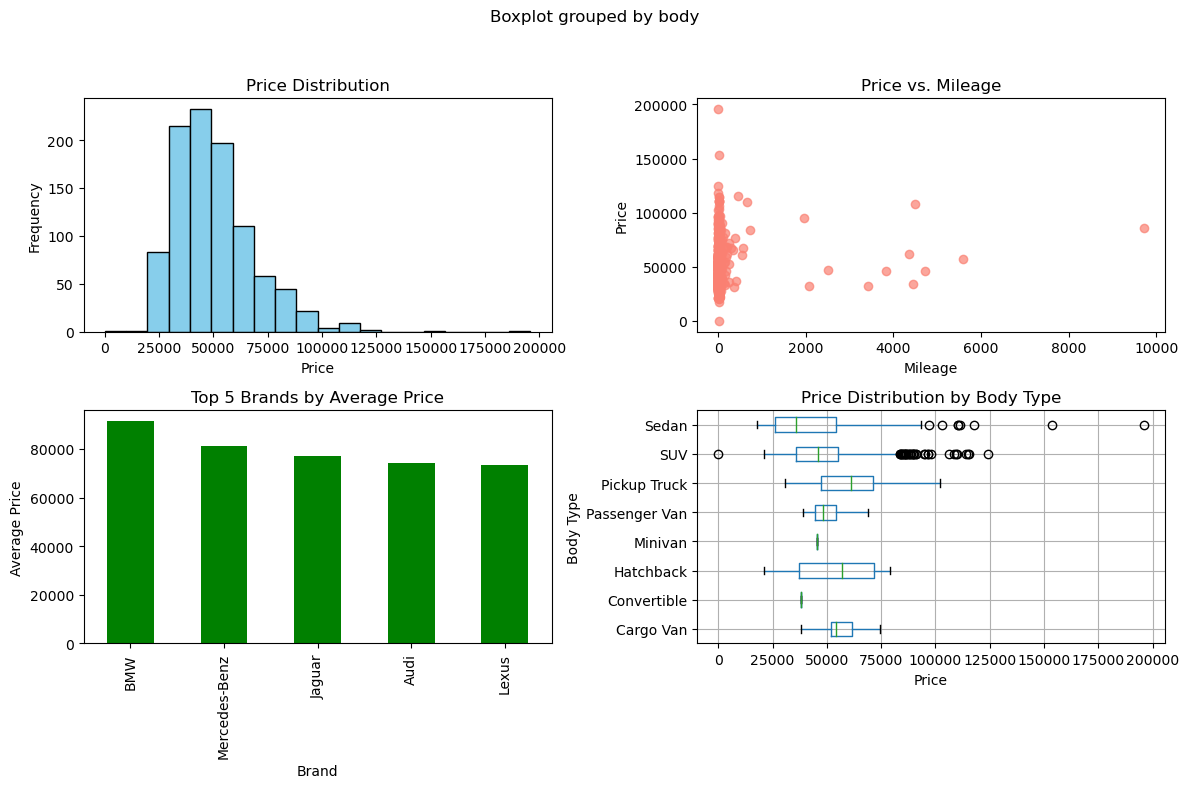

In [9]:
# Set up the figure and axes

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Car Dataset Visualizations')

# Plot 1: Price Distribution
axs[0, 0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Price Distribution')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Scatter plot (Price vs. Mileage)
axs[0, 1].scatter(df['mileage'], df['price'], color='salmon', alpha=0.7)
axs[0, 1].set_title('Price vs. Mileage')
axs[0, 1].set_xlabel('Mileage')
axs[0, 1].set_ylabel('Price')

# Plot 3: Bar chart (Top 5 brands by average price)
top_brands = df.groupby('brand')['price'].mean().nlargest(5)
top_brands.plot(kind='bar', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Top 5 Brands by Average Price')
axs[1, 0].set_xlabel('Brand')
axs[1, 0].set_ylabel('Average Price')

# Plot 4: Box plot (Price distribution by body type)
df.boxplot(column='price', by='body', ax=axs[1, 1], vert=False)
axs[1, 1].set_title('Price Distribution by Body Type')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Body Type')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      1002 non-null   object 
 1   model      1002 non-null   object 
 2   year       1002 non-null   int64  
 3   price      979 non-null    float64
 4   engine     1000 non-null   object 
 5   cylinders  897 non-null    float64
 6   fuel       995 non-null    object 
 7   mileage    968 non-null    float64
 8   body       999 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.6+ KB


In [11]:
df = df.drop_duplicates(subset = ['brand'])
df.head()

,brand,model,year,price,engine,cylinders,fuel,mileage,body
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,SUV
2,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,SUV
3,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,SUV
4,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Pickup Truck
5,Nissan,Murano,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,SUV


In [12]:
df.shape

(28, 9)

In [13]:
df['price'].fillna(df['price'].mean(), inplace=True)
df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['cylinders'].fillna(df['cylinders'].mean(), inplace=True)
df['engine'].fillna(df['engine'].mode()[0], inplace=True)
df['body'].fillna(df['body'].mode()[0], inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 726
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      28 non-null     object 
 1   model      28 non-null     object 
 2   year       28 non-null     int64  
 3   price      28 non-null     float64
 4   engine     28 non-null     object 
 5   cylinders  28 non-null     float64
 6   fuel       28 non-null     object 
 7   mileage    28 non-null     float64
 8   body       28 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ KB


In [15]:
df.head(10)

,brand,model,year,price,engine,cylinders,fuel,mileage,body
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.000000,Gasoline,10.000000,SUV
2,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.000000,Gasoline,0.000000,SUV
3,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.000000,Gasoline,32.000000,SUV
4,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.000000,Diesel,10.000000,Pickup Truck
5,Nissan,Murano,2024,46000.0,24V MPFI DOHC,6.000000,Gasoline,3838.000000,SUV
7,Ford,F-350,2024,89978.0,32V DDI OHV Turbo Diesel,8.000000,Diesel,15.000000,Pickup Truck
8,Hyundai,Tucson Hybrid,2024,42230.0,16V GDI DOHC Turbo Hybrid,4.000000,Hybrid,5.000000,SUV
14,Chevrolet,Blazer EV,2024,51695.0,c,5.136364,Electric,4.000000,SUV
18,Volkswagen,Taos,2024,32751.0,"4 gasoline direct injection, DOHC, variable va...",4.000000,Gasoline,25.000000,SUV
27,Chrysler,Pacifica,2024,48705.0,24V MPFI DOHC,6.000000,Gasoline,344.307692,Passenger Van


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['brand'] = le.fit_transform(df['brand'])
df['model'] = le.fit_transform(df['model'])
df['engine'] = le.fit_transform(df['engine'])
df['fuel'] = le.fit_transform(df['fuel'])
df['body'] = le.fit_transform(df['body'])

df.head()

,brand,model,year,price,engine,cylinders,fuel,mileage,body
0,15,23,2024,74600.0,8,6.0,2,10.0,2
2,9,27,2024,96410.0,13,8.0,2,0.0,2
3,7,5,2023,46835.0,4,8.0,2,32.0,2
4,23,0,2024,81663.0,6,6.0,0,10.0,1
5,22,13,2024,46000.0,10,6.0,2,3838.0,2


In [17]:
df.dtypes

brand          int32
model          int32
year           int64
price        float64
engine         int32
cylinders    float64
fuel           int32
mileage      float64
body           int32
dtype: object

In [18]:
df.isna().sum()

brand        0
model        0
year         0
price        0
engine       0
cylinders    0
fuel         0
mileage      0
body         0
dtype: int64

In [19]:
X = df.drop(columns = ['price'])
y = df['price']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error

accuracy = []
for fold in range(0, 10):
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
accuracy.append(mae)
print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 10: MAE = 14687.635
Average MAE: 14687.64


In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 380247874.59


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
model_params = {
                 'Ridge': {
                   'model': Ridge(),
                   'params': {
                               'alpha': [0.1, 1.0, 10.0, 100.0],
                               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
                 }
             },
    
                 'Lasso': {
                      'model': Lasso(),
                      'params': {
                                  'alpha': [0.1, 1.0, 10.0, 100.0],
                                  'max_iter': [1000, 2000, 3000]
                }
             },
    
    
                 'linear' : {
                     
                     'model' : LinearRegression(),
                     'params' : {
                                'fit_intercept': [True, False],
                                'copy_X': [True, False]
                     }
                 },
                 
                 'random_forest' : {
                     
                           'model' : RandomForestRegressor(),
                           'params' : {
                                        'n_estimators' : [100],'max_depth' : [10]
                           }
                 },
                 
                 'decision_tree' : {
                               
                            'model' : DecisionTreeRegressor(),
                            'params' : {
                                         'criterion': ['mse', 'friedman_mse'],
                                         'max_depth': [10,20,30]
                            }
                 },
                 
                 'GradientBoostingRegressor' : {
                     
                             'model' : GradientBoostingRegressor(),
                             'params' : {
                                          'n_estimators' : [100],'learning_rate' : [0.1]
                             }
                 }
                 
}

In [27]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
        reg = GridSearchCV(mp['model'],mp['params'],cv=5, scoring='neg_mean_squared_error', return_train_score=False)
        reg.fit(X,y)
        scores.append({
            'model': model_name,
        'best_score': reg.best_score_,
        'best_params': reg.best_params_
        })
        
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df        

,model,best_score,best_params
0,Ridge,-3.777003e+08,"{'alpha': 10.0, 'solver': 'lsqr'}"
1,Lasso,-6.872516e+08,"{'alpha': 100.0, 'max_iter': 1000}"
2,linear,-5.723972e+08,"{'copy_X': True, 'fit_intercept': False}"
3,random_forest,-4.384228e+08,"{'max_depth': 10, 'n_estimators': 100}"
4,decision_tree,-6.623145e+08,"{'criterion': 'friedman_mse', 'max_depth': 30}"
5,GradientBoostingRegressor,-5.087592e+08,"{'learning_rate': 0.1, 'n_estimators': 100}"
